In [489]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for important metrics
from sklearn import metrics

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

#Package for random forest 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

#Package for AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

#Package for Voting Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [490]:
fetal_df = pd.read_csv('fetal_health.csv')
fetal_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [491]:
# Dropping null values
fetal_df.dropna(inplace = True)
fetal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [492]:
# Distribution of fetal health column
fetal_df['fetal_health'].value_counts(normalize = True)

fetal_health
1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: proportion, dtype: float64

In [493]:
# Output column for prediction
output = fetal_df['fetal_health'] 

# Input features 
features = fetal_df[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability',
                     'percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean',
                     'histogram_median','histogram_variance','histogram_tendency']] 

features.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [533]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(features, output, test_size = 0.25, random_state = 1) 

# Defining prediction model
dt_model = DecisionTreeClassifier(random_state = 2, class_weight="balanced")

# Fitting model on training data
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(class_weight='balanced', random_state=2)

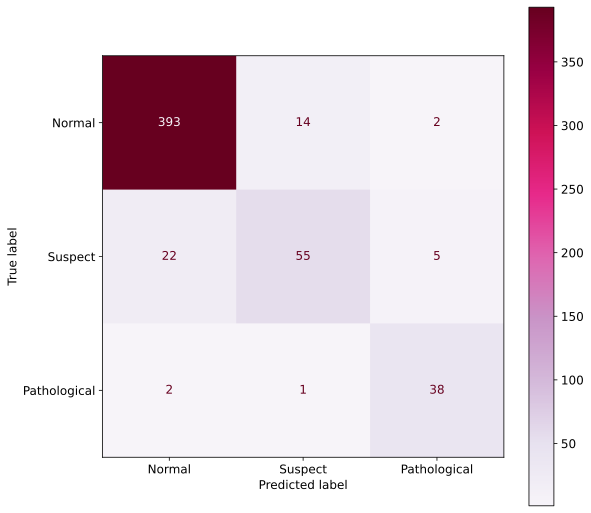

In [534]:
# Predictions on test set
y_pred = dt_model.predict(test_X)

# Define the label mapping
labels = ["Normal", "Suspect", "Pathological"]

# Generate confusion matrix with integer labels corresponding to the categories
cm = confusion_matrix(test_y, y_pred, labels=[1, 2, 3])

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Specify figure size and display font size
fig, ax = plt.subplots(figsize=(9, 9))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap='PuRd', ax=ax)
fig


In [535]:

# Define label mapping
label_mapping = {1: "Normal", 2: "Suspect", 3: "Pathological"}

# Map the predictions and test labels to the new names
mapped_test_y = [label_mapping[label] for label in test_y]
mapped_y_pred = [label_mapping[label] for label in y_pred]

# Generate the classification report with renamed labels
report = classification_report(mapped_test_y, mapped_y_pred, output_dict=True)
fetal_report_df = pd.DataFrame(report)

# Display the DataFrame
fetal_report_df

# Save the report as a CSV file
fetal_report_df.to_csv('Class_report_dt.csv')
fetal_report_df

,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.942446,0.844444,0.785714,0.913534,0.857535,0.910735
recall,0.960880,0.926829,0.670732,0.913534,0.852814,0.913534
f1-score,0.951574,0.883721,0.723684,0.913534,0.852993,0.911219
support,409.000000,41.000000,82.000000,0.913534,532.000000,532.000000


In [497]:
# Storing importance values from the trained model
importance = dt_model.feature_importances_

# Storing feature importance as a dataframe
feature_imp_dt = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_dt = feature_imp_dt.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp_dt['Feature'], feature_imp_dt['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_dt.svg");

feature_imp_dt

,Feature,Importance
0,mean_value_of_short_term_variability,0.247036
1,histogram_mean,0.220648
2,abnormal_short_term_variability,0.122148
3,percentage_of_time_with_abnormal_long_term_var...,0.114557
4,baseline value,0.037346
5,histogram_number_of_peaks,0.032696
6,uterine_contractions,0.029078
7,histogram_max,0.028878
8,accelerations,0.028355
9,histogram_min,0.021512


In [498]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_fetal_pickle = open('dt_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(dt_model, dt_fetal_pickle) 

# Close the file
dt_fetal_pickle.close()

Random Forest section

In [536]:
# Split data into training and test sets
train_X1, test_X1, train_y1, test_y1  =  train_test_split(features, output,test_size=0.25, random_state=4)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=5,class_weight="balanced")

# Train the model
rf_model.fit(train_X1, train_y1)


RandomForestClassifier(class_weight='balanced', random_state=5)

In [531]:
# Storing importance values from the trained model
importance1 = rf_model.feature_importances_

# Storing feature importance as a dataframe
feature_imp2 = pd.DataFrame(list(zip(train_X1.columns, importance1)),
               columns = ['Feature', 'Importance'])

feature_imp2 = feature_imp2.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp2['Feature'], feature_imp2['Importance'], color = ['blue', 'green'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_rf.svg");

feature_imp2

,Feature,Importance
0,mean_value_of_short_term_variability,0.131239
1,percentage_of_time_with_abnormal_long_term_var...,0.115956
2,abnormal_short_term_variability,0.112116
3,histogram_mean,0.095986
4,histogram_median,0.058917
5,histogram_mode,0.054913
6,prolongued_decelerations,0.049755
7,histogram_min,0.048779
8,mean_value_of_long_term_variability,0.044930
9,accelerations,0.042078


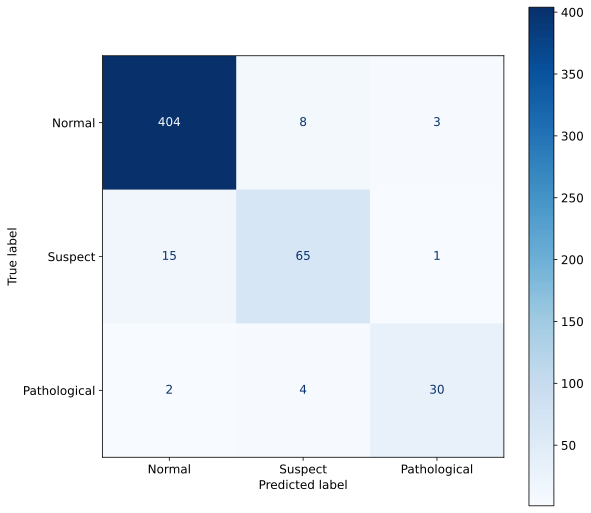

In [501]:
# Predictions on test set
y1_pred = rf_model.predict(test_X1)

# Define the label mapping
labels = ["Normal", "Suspect", "Pathological"]

# Generate confusion matrix with integer labels corresponding to the categories
cm = confusion_matrix(test_y1, y1_pred, labels=[1, 2, 3])

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Specify figure size and display font size
fig3, ax = plt.subplots(figsize=(9, 9))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap='Blues', ax=ax)
fig3



In [502]:
# Define label mapping
label_mapping = {1: "Normal", 2: "Suspect", 3: "Pathological"}

# Map the predictions and test labels to the new names
mapped_test_y1 = [label_mapping[label] for label in test_y1]
mapped_y_pred1 = [label_mapping[label] for label in y1_pred]

# Generate the classification report with renamed labels
report = classification_report(mapped_test_y1, mapped_y_pred1, output_dict=True)
fetal_report_rf = pd.DataFrame(report)

# Display the DataFrame
fetal_report_rf

# Save the report as a CSV file
fetal_report_rf.to_csv('fetal_class_report_rf.csv')
fetal_report_rf


,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.959620,0.882353,0.844156,0.93797,0.895376,0.936811
recall,0.973494,0.833333,0.802469,0.93797,0.869765,0.937970
f1-score,0.966507,0.857143,0.822785,0.93797,0.882145,0.937224
support,415.000000,36.000000,81.000000,0.93797,532.000000,532.000000


In [503]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
fetal_pickle_rf = open('rf_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(rf_model, fetal_pickle_rf) 

# Close the file
fetal_pickle_rf.close()

AdaBoost

In [ ]:


# Split data into training and test sets
train_X2, test_X2, train_y2, test_y2  =  train_test_split(features, output,test_size=0.25, random_state=4)

# AdaBoost Classifier

ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=5, algorithm="SAMME")

# Train the AdaBoost model
ada_model.fit(train_X2, train_y2)


AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=100,
                   random_state=5)

In [558]:
# Test for accuracy of AdaBoost model

y_pred2 = ada_model.predict(test_X2)

print('Accuracy:'), metrics.accuracy_score(test_y2,y_pred2)

Accuracy:


(None, 0.9097744360902256)

In [506]:
# Storing importance values from the trained model
importance2 = ada_model.feature_importances_

# Storing feature importance as a dataframe
feature_imp3 = pd.DataFrame(list(zip(train_X2.columns, importance2)),
               columns = ['Feature', 'Importance'])

feature_imp3 = feature_imp3.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp3['Feature'], feature_imp3['Importance'], color = ['yellow', 'green'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_ada.svg");

feature_imp3

,Feature,Importance
0,abnormal_short_term_variability,0.194227
1,percentage_of_time_with_abnormal_long_term_var...,0.184288
2,histogram_mean,0.085548
3,histogram_mode,0.080756
4,mean_value_of_short_term_variability,0.079330
5,accelerations,0.049083
6,baseline value,0.048161
7,prolongued_decelerations,0.046944
8,histogram_variance,0.043965
9,uterine_contractions,0.034788


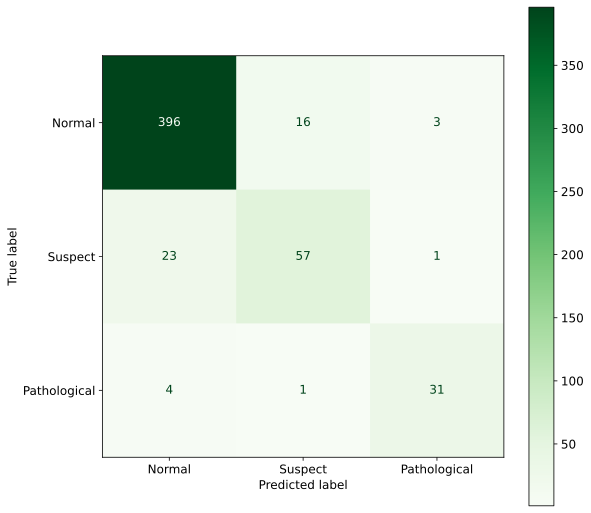

In [507]:
# Predictions on test set
y2_pred = ada_model.predict(test_X2)

# Define the label mapping
labels = ["Normal", "Suspect", "Pathological"]

# Generate confusion matrix with integer labels corresponding to the categories
cm3 = confusion_matrix(test_y2, y2_pred, labels=[1, 2, 3])

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=labels)

# Specify figure size and display font size
fig4, ax = plt.subplots(figsize=(9, 9))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap='Greens', ax=ax)
fig4

In [508]:
# Define label mapping
label_mapping = {1: "Normal", 2: "Suspect", 3: "Pathological"}

# Map the predictions and test labels to the new names
mapped_test_y2 = [label_mapping[label] for label in test_y2]
mapped_y_pred2 = [label_mapping[label] for label in y2_pred]

# Generate the classification report with renamed labels
report = classification_report(mapped_test_y2, mapped_y_pred2, output_dict=True)
fetal_report_ada = pd.DataFrame(report)

# Display the DataFrame
fetal_report_ada

# Save the report as a CSV file
fetal_report_ada.to_csv('fetal_class_report_ada.csv')
fetal_report_ada


,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.936170,0.885714,0.770270,0.909774,0.864052,0.907497
recall,0.954217,0.861111,0.703704,0.909774,0.839677,0.909774
f1-score,0.945107,0.873239,0.735484,0.909774,0.851277,0.908328
support,415.000000,36.000000,81.000000,0.909774,532.000000,532.000000


In [509]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
fetal_pickle_ada = open('ada_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(ada_model, fetal_pickle_ada) 

# Close the file
fetal_pickle_ada.close()

Soft Voting Section

In [510]:
# Defining F1 scored from class reports
F1_score_dt=pd.read_csv('fetal_class_report_dt.csv').at[2,"macro avg"]
F1_score_rf=pd.read_csv('fetal_class_report_rf.csv').at[2,"macro avg"]
F1_score_ada=pd.read_csv('fetal_class_report_ada.csv').at[2,"macro avg"]

print(F1_score_dt,F1_score_rf,F1_score_ada)

# Summing the weights
weights_summed= F1_score_dt+F1_score_rf+F1_score_ada

# Normalizing the weights
norm_F1_score_dt= F1_score_dt/weights_summed
norm_F1_score_rf= F1_score_rf/weights_summed
norm_F1_score_ada= F1_score_ada/weights_summed

norm_weights = [norm_F1_score_dt, norm_F1_score_rf, norm_F1_score_ada]
print(norm_weights)



0.8574584301032181 0.8821449481009774 0.8512769020518264
[0.33095254791876644, 0.34048078362532713, 0.3285666684559065]


In [559]:
# Split data into training and test sets
train_X3, test_X3, train_y3, test_y3  =  train_test_split(features, output,test_size=0.25, random_state=7)

#Soft Voting Classifier
svc_model= VotingClassifier(
    estimators=[('dt', dt_model), ('rf', rf_model), ('ada', ada_model)],
    voting='soft',
    n_jobs= -1,  
    weights=norm_weights ) 

# Train the svc model
svc_model.fit(train_X3, train_y3)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     random_state=2)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=5)),
                             ('ada',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 learning_rate=1,
                                                 n_estimators=100,
                                                 random_state=5))],
                 n_jobs=-1, voting='soft',
                 weights=[0.33095254791876644, 0.34048078362532713,
                          0.3285666684559065])

In [561]:

aggregated_importance = (
    norm_F1_score_dt * feature_imp_dt['Importance'].values +
    norm_F1_score_rf * feature_imp2['Importance'].values +
    norm_F1_score_ada * feature_imp3['Importance'].values)

# Create a DataFrame for aggregated importance
feature_imp_voting = pd.DataFrame(list(zip(train_X3.columns, aggregated_importance)),
                                  columns=['Feature', 'Importance'])
feature_imp_voting = feature_imp_voting.sort_values('Importance', ascending=False).reset_index(drop=True)

# Plot aggregated feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_imp_voting['Feature'], feature_imp_voting['Importance'], color='skyblue')
plt.xlabel("Aggregated Importance")
plt.ylabel("Feature")
plt.title('Aggregated Feature Importance from Voting Classifier')
plt.tight_layout()
plt.savefig("feature_imp_voting.svg")

# Show the DataFrame
feature_imp_voting


,Feature,Importance
0,baseline value,0.190258
1,accelerations,0.173056
2,fetal_movement,0.106707
3,uterine_contractions,0.097128
4,light_decelerations,0.058485
5,severe_decelerations,0.045645
6,prolongued_decelerations,0.042388
7,abnormal_short_term_variability,0.041590
8,mean_value_of_short_term_variability,0.039127
9,percentage_of_time_with_abnormal_long_term_var...,0.032876


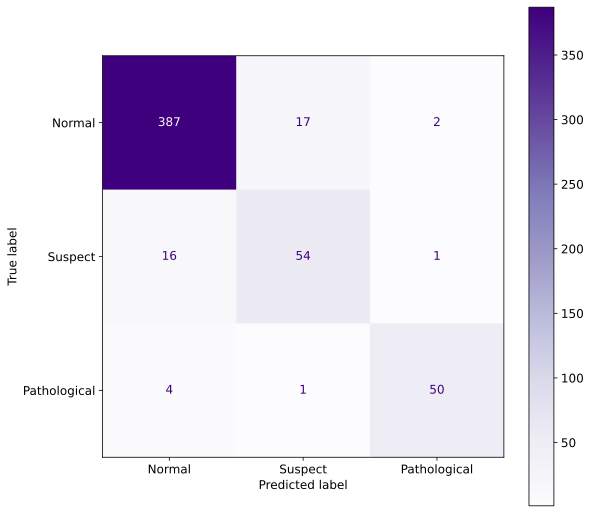

In [562]:
# Predictions on test set
y3_pred = svc_model.predict(test_X3)

# Define the label mapping
labels = ["Normal", "Suspect", "Pathological"]

# Generate confusion matrix with integer labels corresponding to the categories
cm3 = confusion_matrix(test_y3, y3_pred, labels=[1, 2, 3])

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=labels)

# Specify figure size and display font size
fig5, ax = plt.subplots(figsize=(9, 9))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap='Purples', ax=ax)

fig5

In [563]:
# Define label mapping
label_mapping = {1: "Normal", 2: "Suspect", 3: "Pathological"}

# Map the predictions and test labels to the new names
mapped_test_y3 = [label_mapping[label] for label in test_y3]
mapped_y_pred3 = [label_mapping[label] for label in y3_pred]

# Generate the classification report with renamed labels
report = classification_report(mapped_test_y3, mapped_y_pred3, output_dict=True)
fetal_report_svc = pd.DataFrame(report)

# Display the DataFrame
fetal_report_svc

# Save the report as a CSV file
fetal_report_svc.to_csv('fetal_class_report_svc.csv')
fetal_report_svc


,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.950860,0.943396,0.750000,0.922932,0.881419,0.923282
recall,0.953202,0.909091,0.760563,0.922932,0.874285,0.922932
f1-score,0.952030,0.925926,0.755245,0.922932,0.877733,0.923068
support,406.000000,55.000000,71.000000,0.922932,532.000000,532.000000


In [564]:
# Pickle file: saving the trained SVC model
# Creating the file where we want to write the model
fetal_pickle_svc = open('soft_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(svc_model, fetal_pickle_svc) 

# Close the file
fetal_pickle_svc.close()